In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,784 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [4]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

In [169]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np
from google.colab.patches import cv2_imshow

In [170]:
# def plt_imshow(title='image', img=None, figsize=(8 ,5)):
#     plt.figure(figsize=figsize)
 
#     if type(img) == list:
#         if type(title) == list:
#             titles = title
#         else:
#             titles = []
 
#             for i in range(len(img)):
#                 titles.append(title)
 
#         for i in range(len(img)):
#             if len(img[i].shape) <= 2:
#                 rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
#             else:
#                 rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
#             plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
#             plt.title(titles[i])
#             plt.xticks([]), plt.yticks([])
 
#         plt.show()
#     else:
#         if len(img.shape) < 3:
#             rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#         else:
#             rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
#         plt.imshow(rgbImg)
#         plt.title(title)
#         plt.xticks([]), plt.yticks([])
#         plt.show()

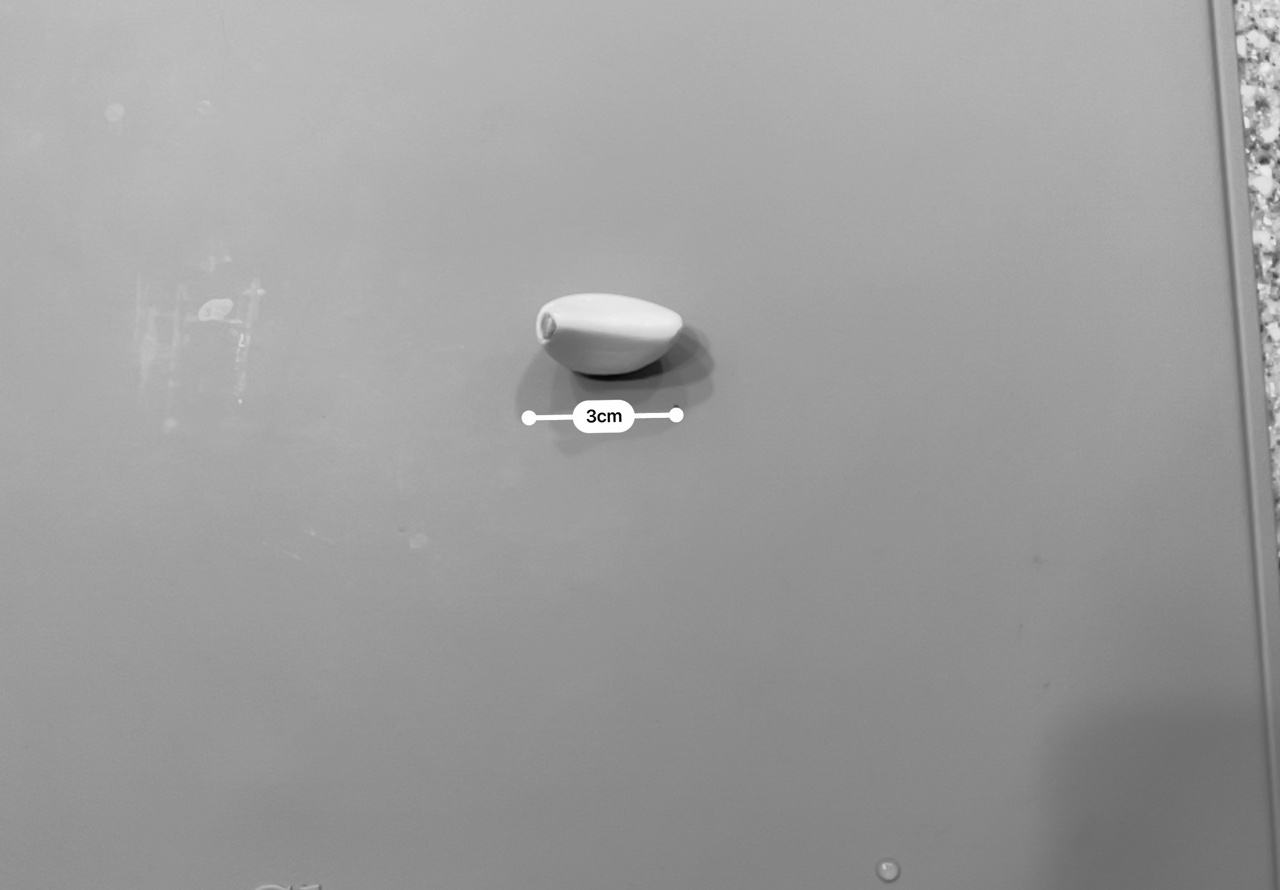

In [171]:
# imread
imageOrgCp = cv2.imread("/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project/length/test/galic_3cm.jpg")
height, width, channel = imageOrgCp.shape
center = (width//2, height//2)

grayCp = cv2.cvtColor(imageOrgCp, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayCp)

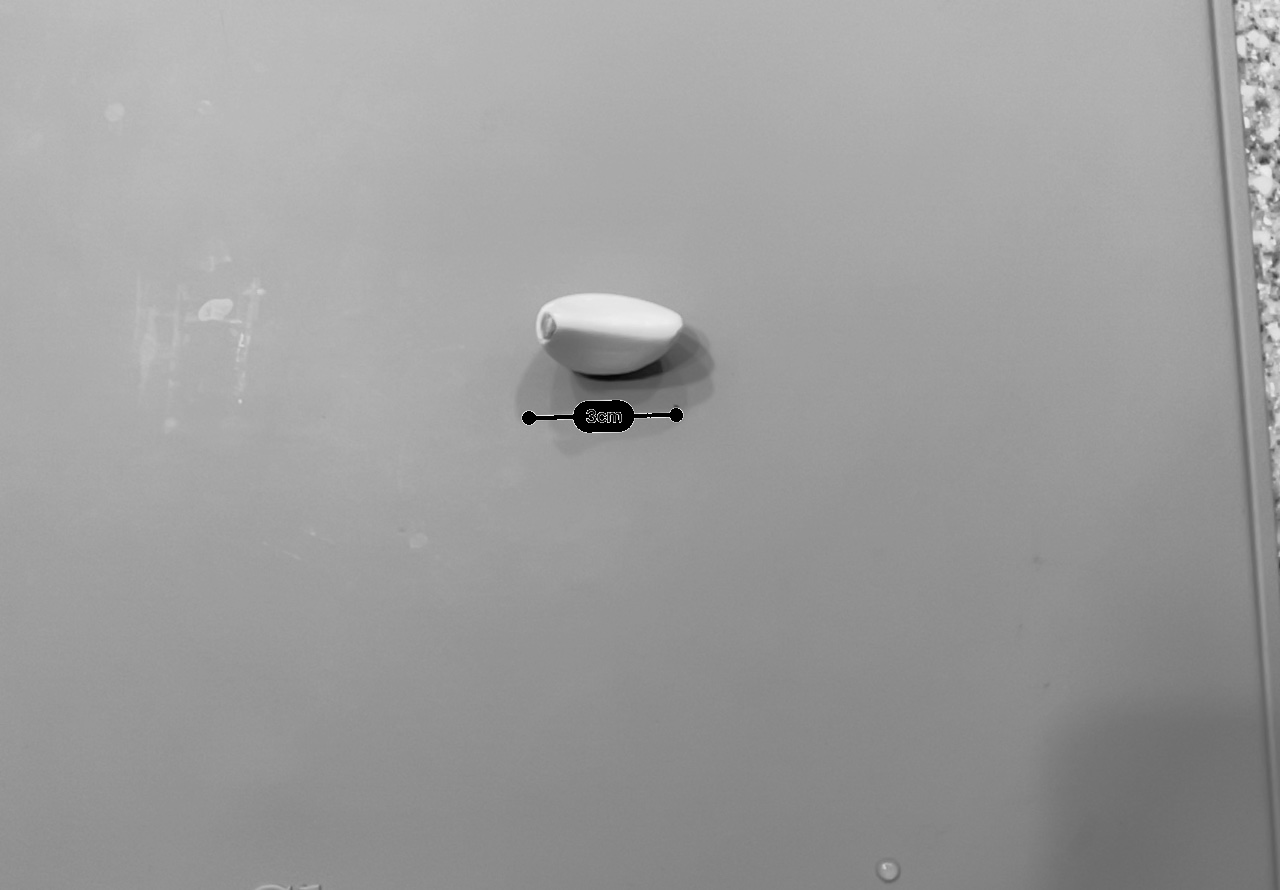

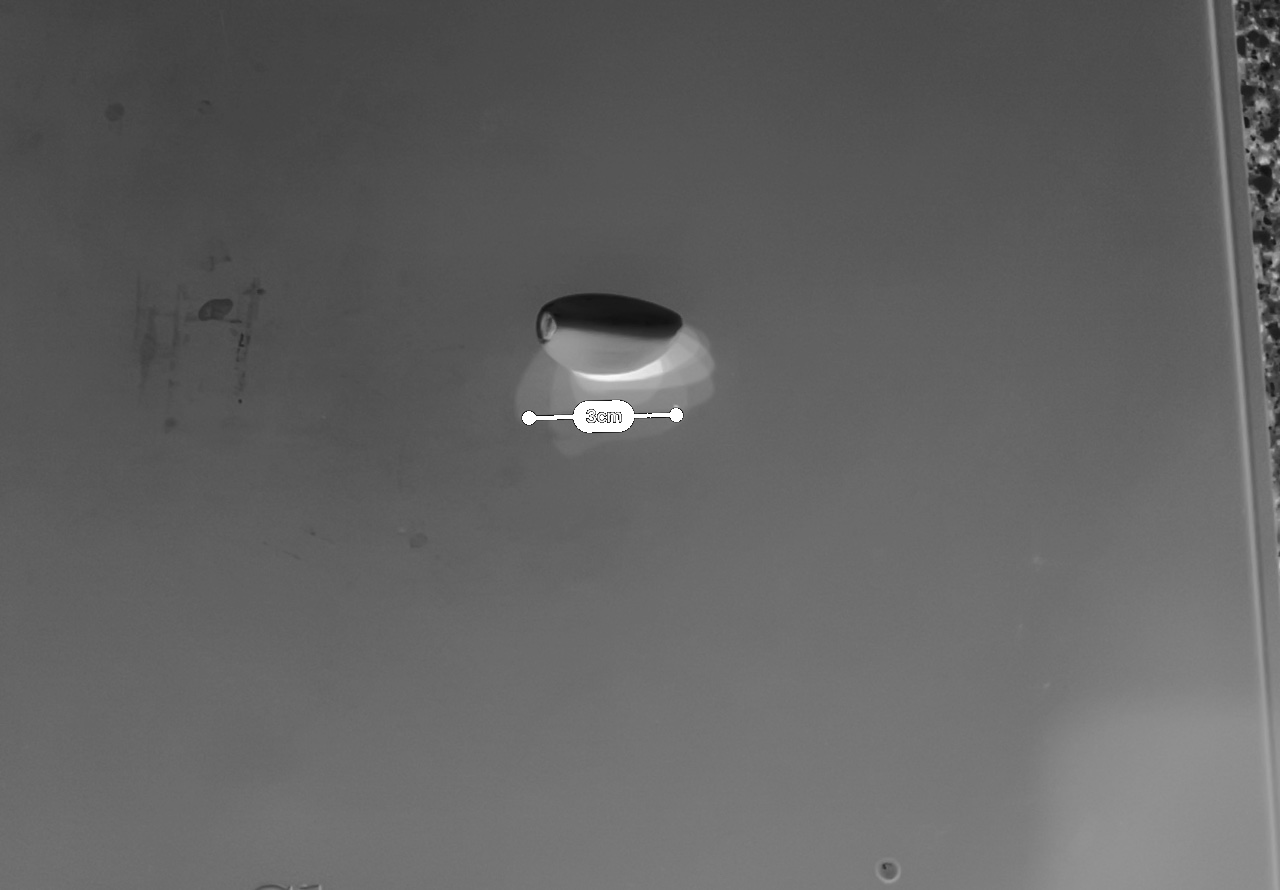

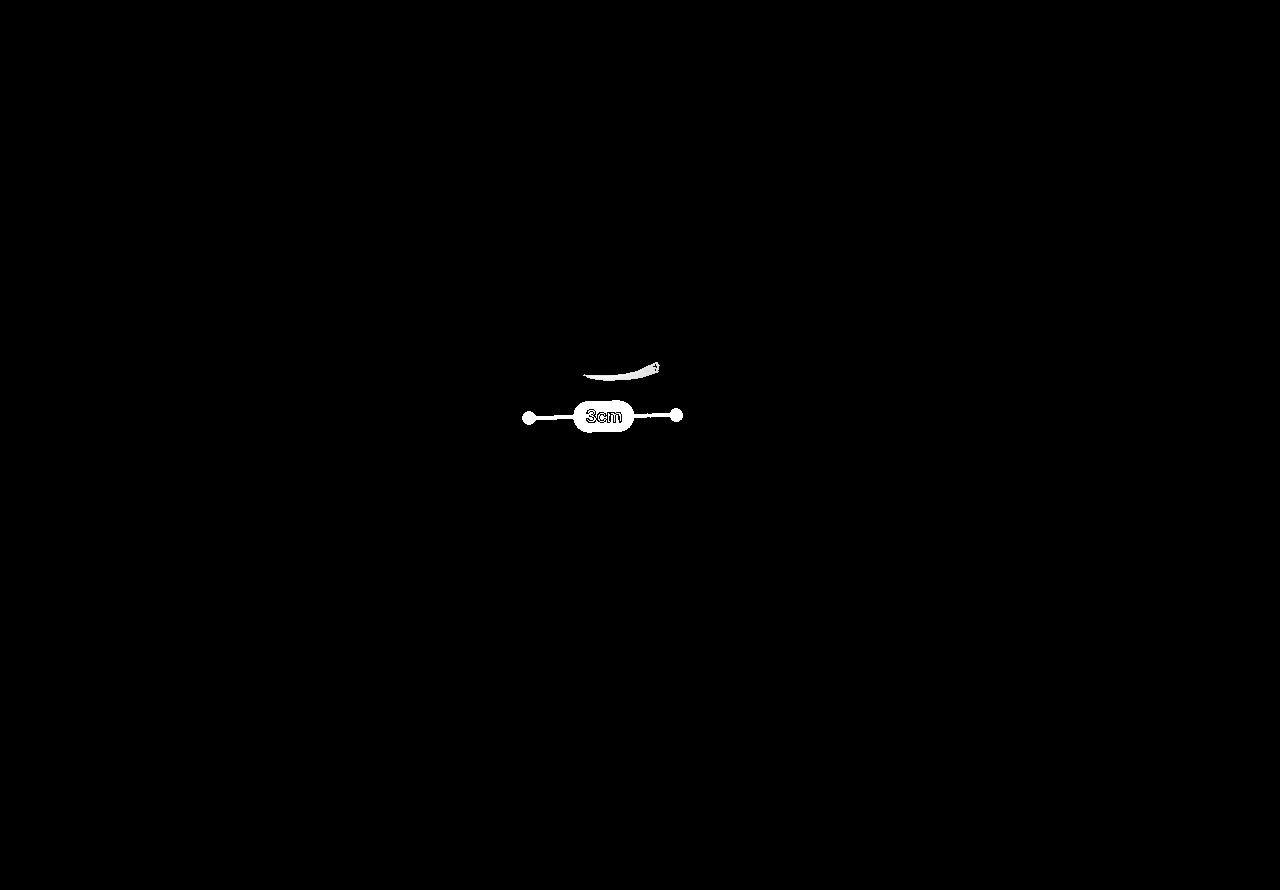

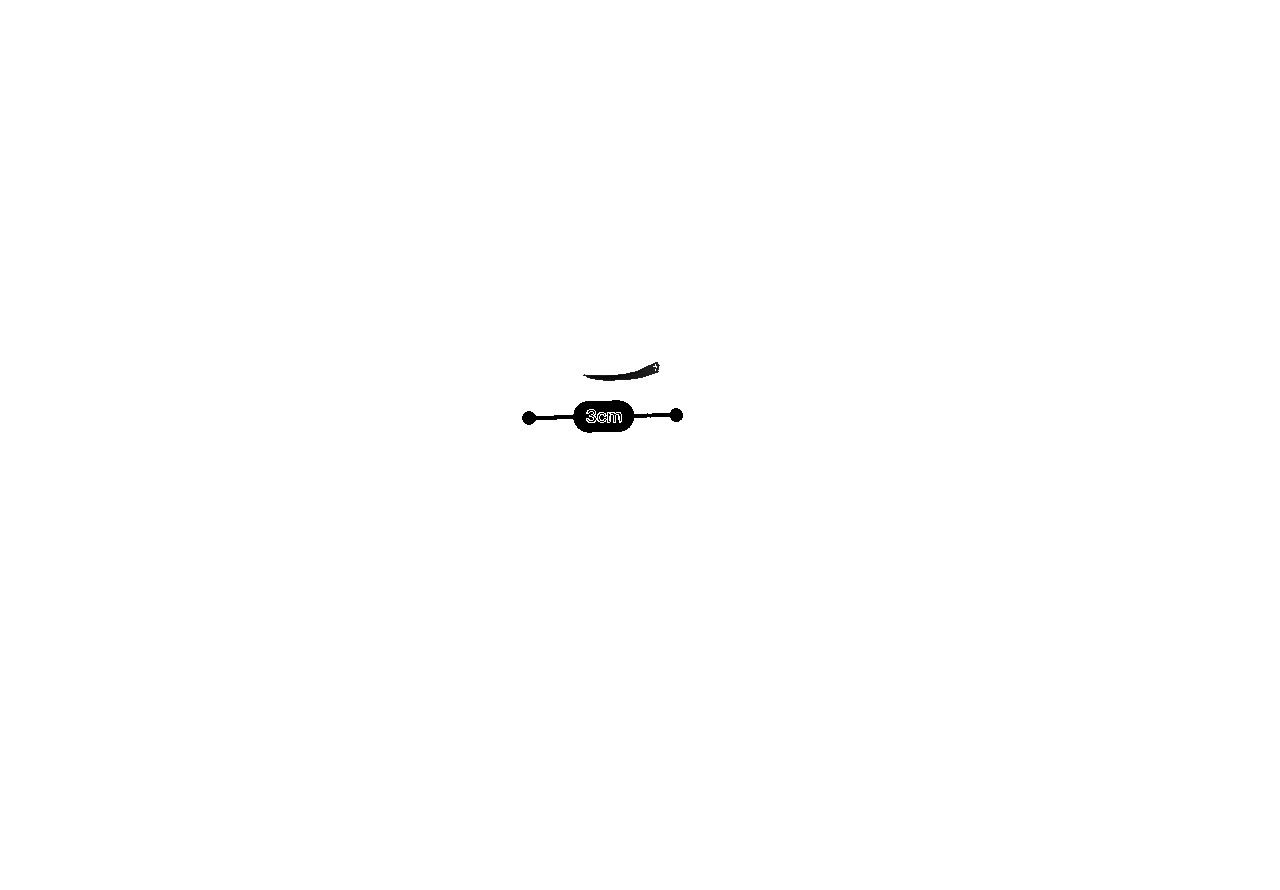

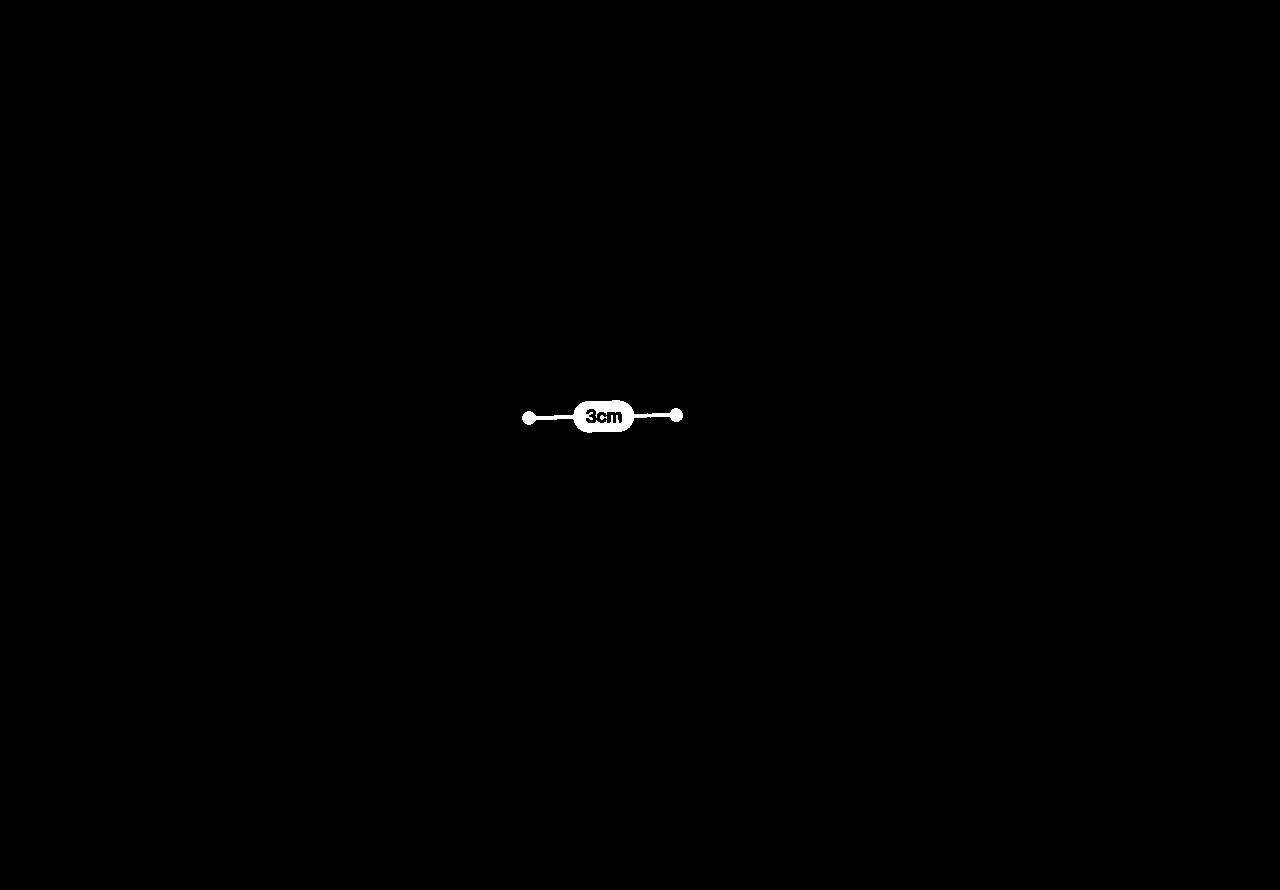

In [172]:
image = grayCp
threshold = 245
ret, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
mask = cv2.bitwise_not(mask)
result = cv2.bitwise_or(image, image, mask=mask)
cv2_imshow(result)
result = 255-result
cv2_imshow(result)

lower_white = np.array([220], dtype=np.uint8)
upper_white = np.array([255], dtype=np.uint8)
mask = cv2.inRange(result, lower_white, upper_white)
result[mask != 255] = [0]

result2 = 255 - result
cv2_imshow(result)
cv2_imshow(result2)

result = cv2.bitwise_and(image, result)
cv2_imshow(result)
# #text
# options = "--psm 6"
# text = pytesseract.image_to_string(result, config=options) # , config=options
# arr = text.split('\n')[0:-1]
# text = '\n'.join(arr)
# print(text)

# result2 = cv2.bitwise_or(result, result2)
# cv2_imshow(result2)


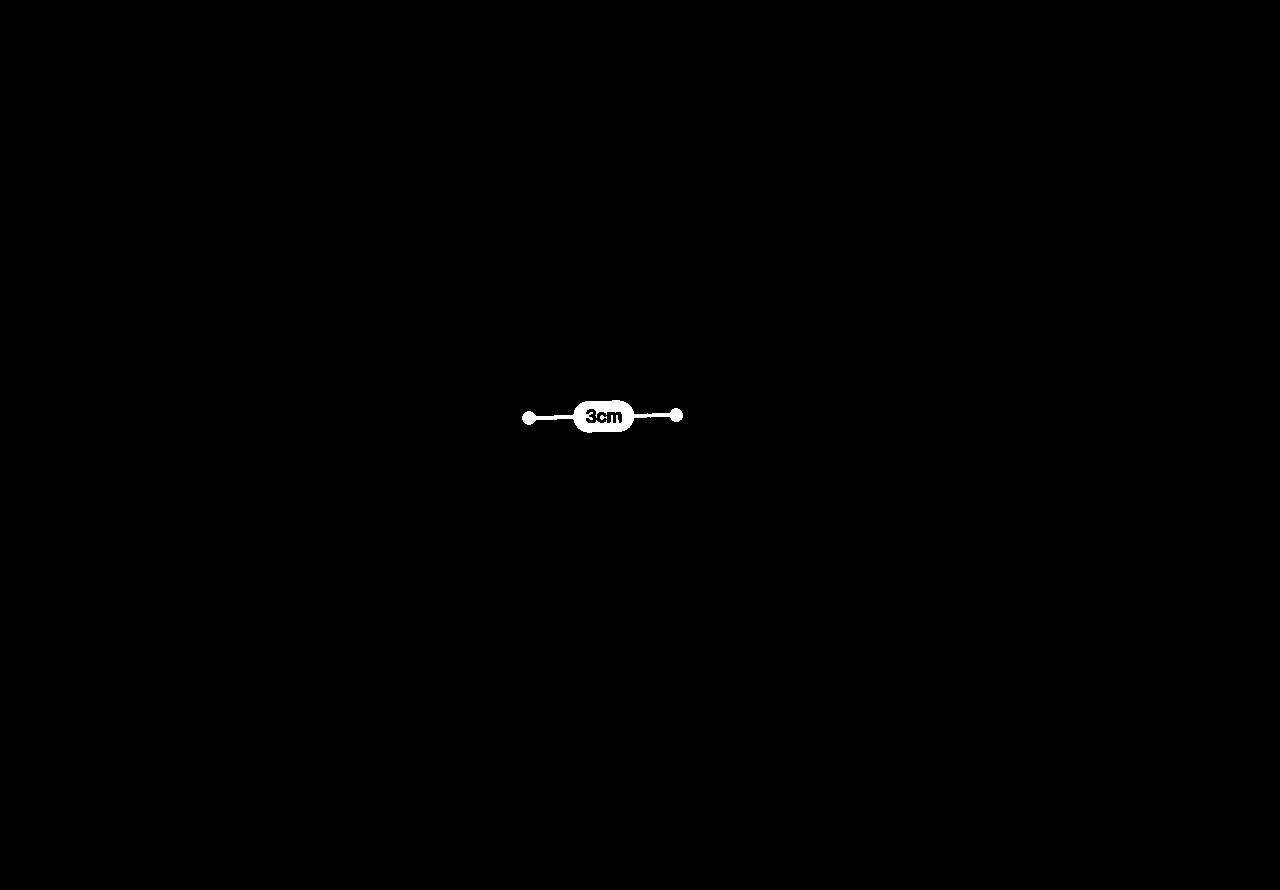

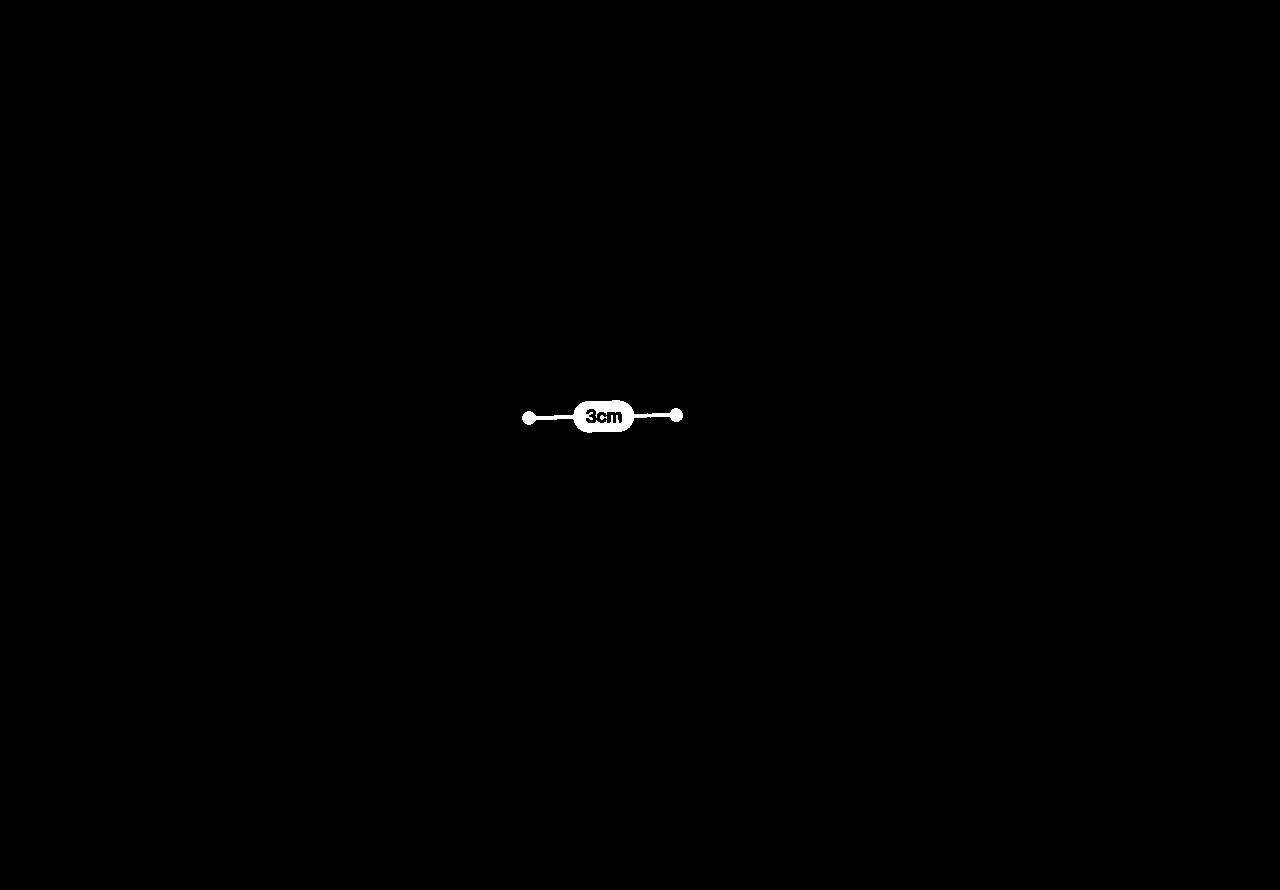

—o-


In [173]:
M = cv2.getRotationMatrix2D(center, 0, 1.0)
rotated = cv2.warpAffine(result, M, (width,height))
cv2_imshow(result)
cv2_imshow(rotated)

#text
options = "--psm 6"
text = pytesseract.image_to_string(rotated, config=options) # , config=options
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

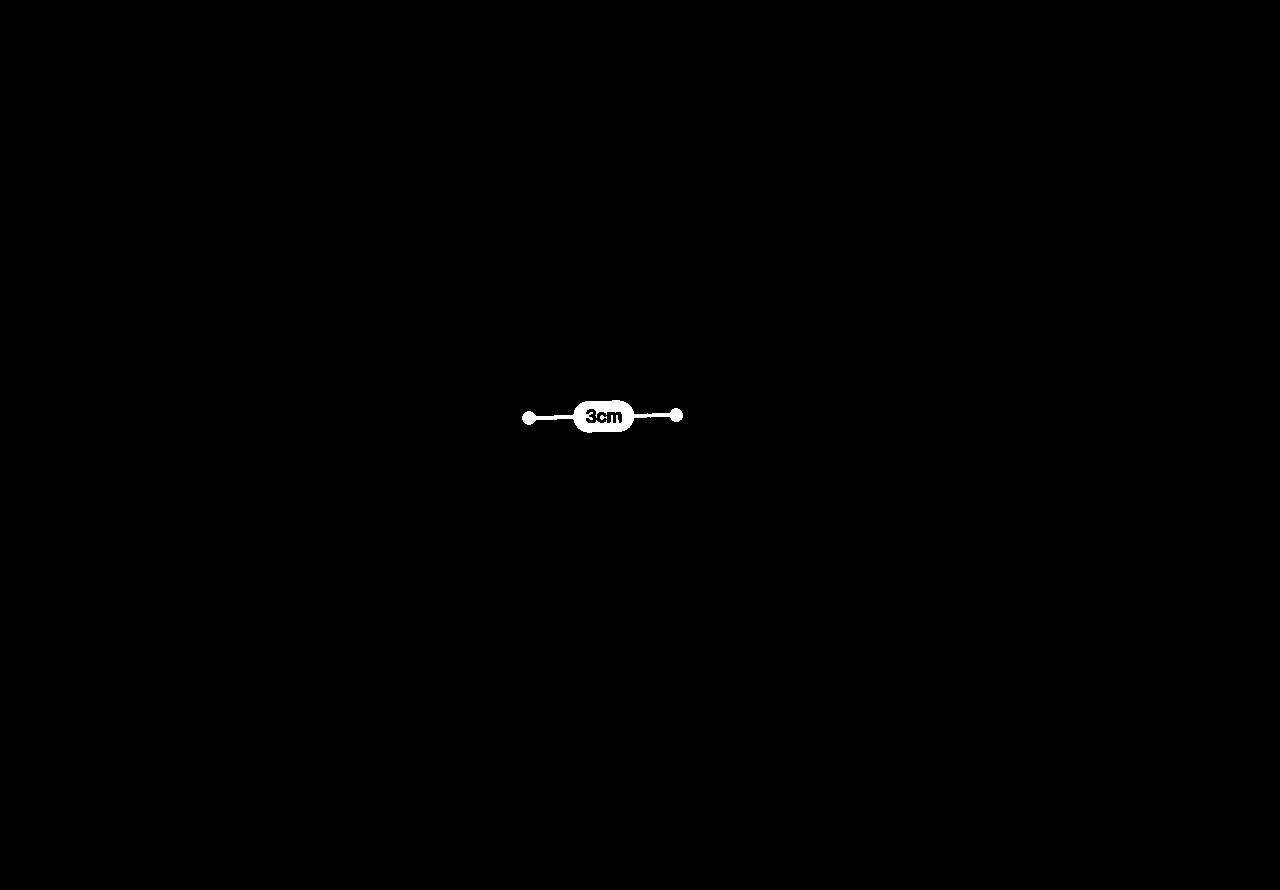

In [174]:
gray = rotated
cv2_imshow(gray)

In [175]:
img_blurred = cv2.GaussianBlur(gray, ksize=(1, 1), sigmaX=0)

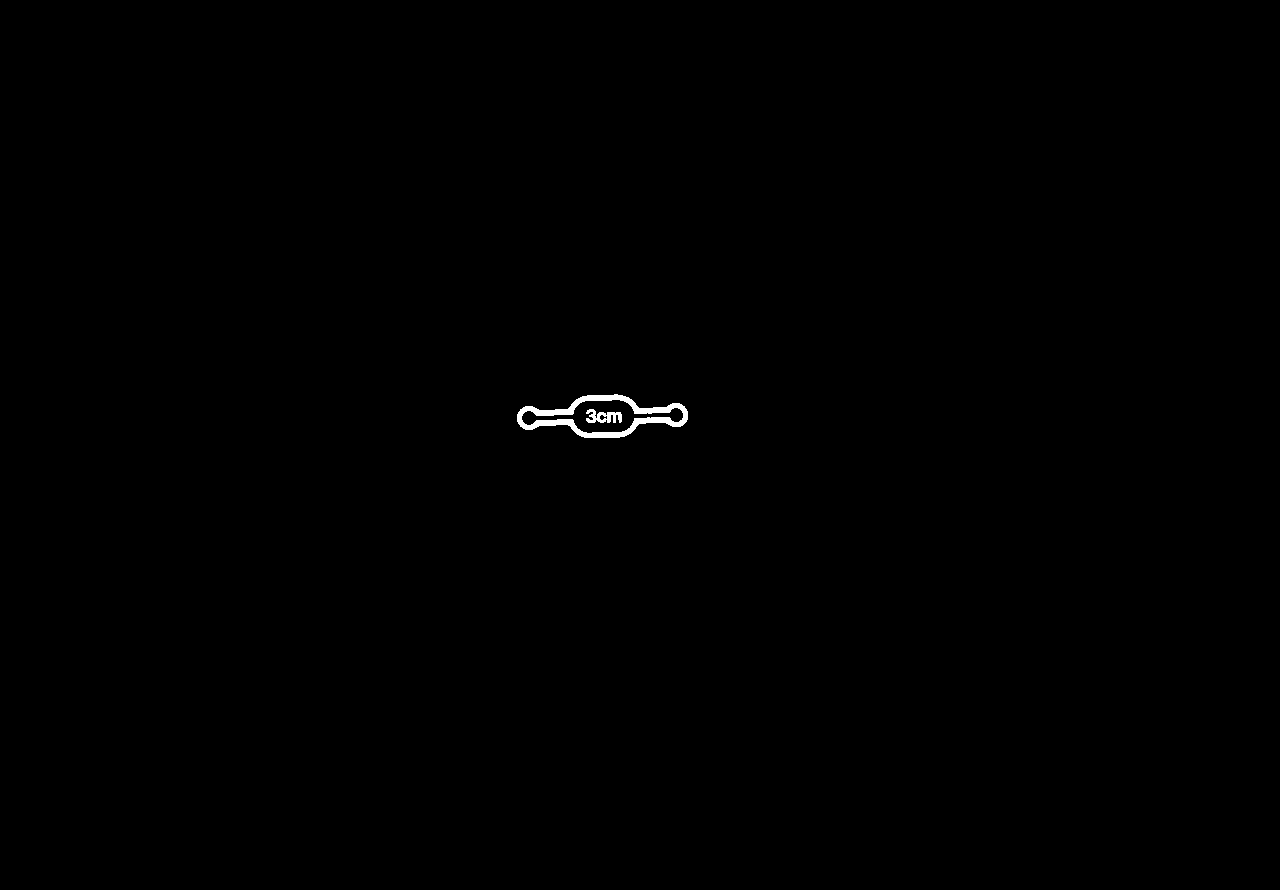

In [176]:
img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)
cv2_imshow(img_thresh)

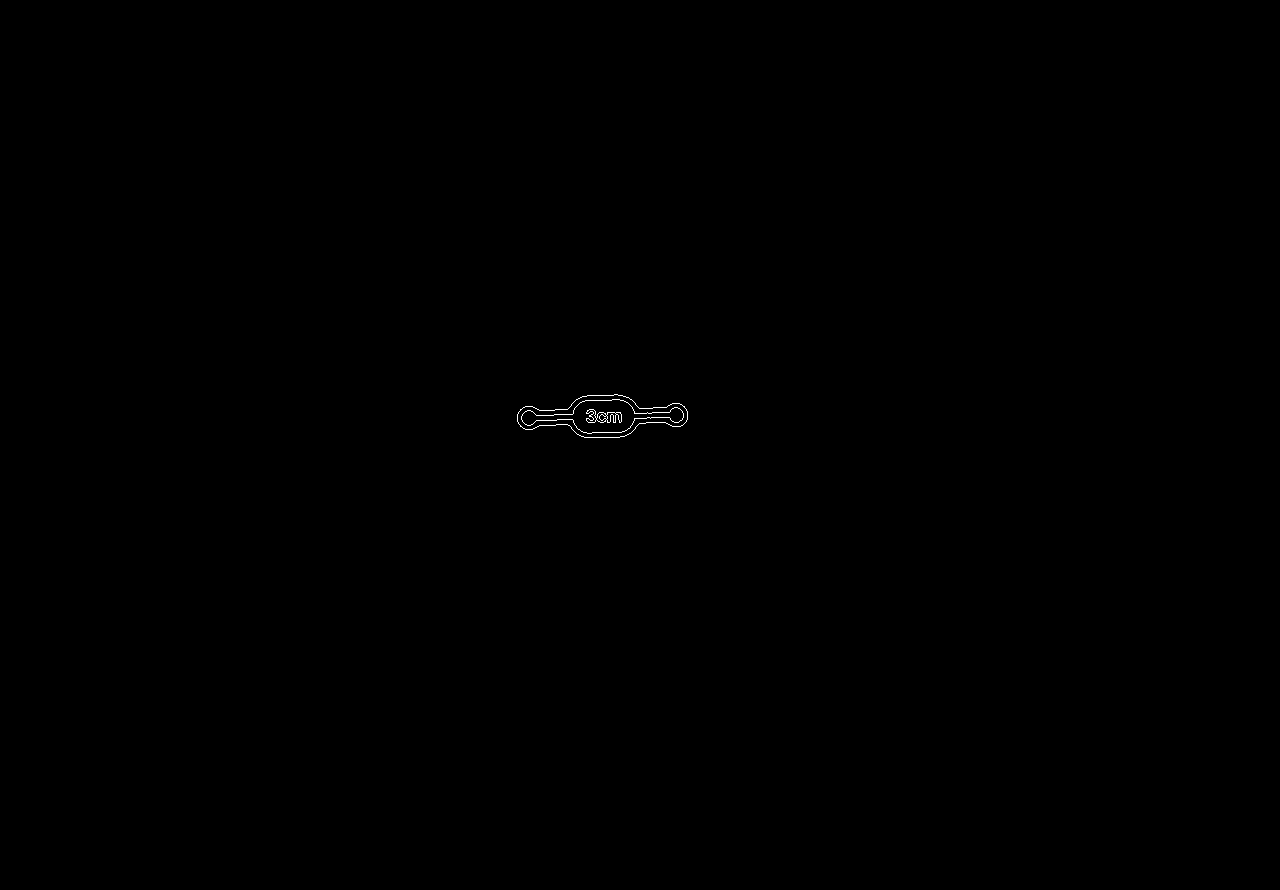

In [177]:
contours, _ = cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

cv2_imshow(temp_result)

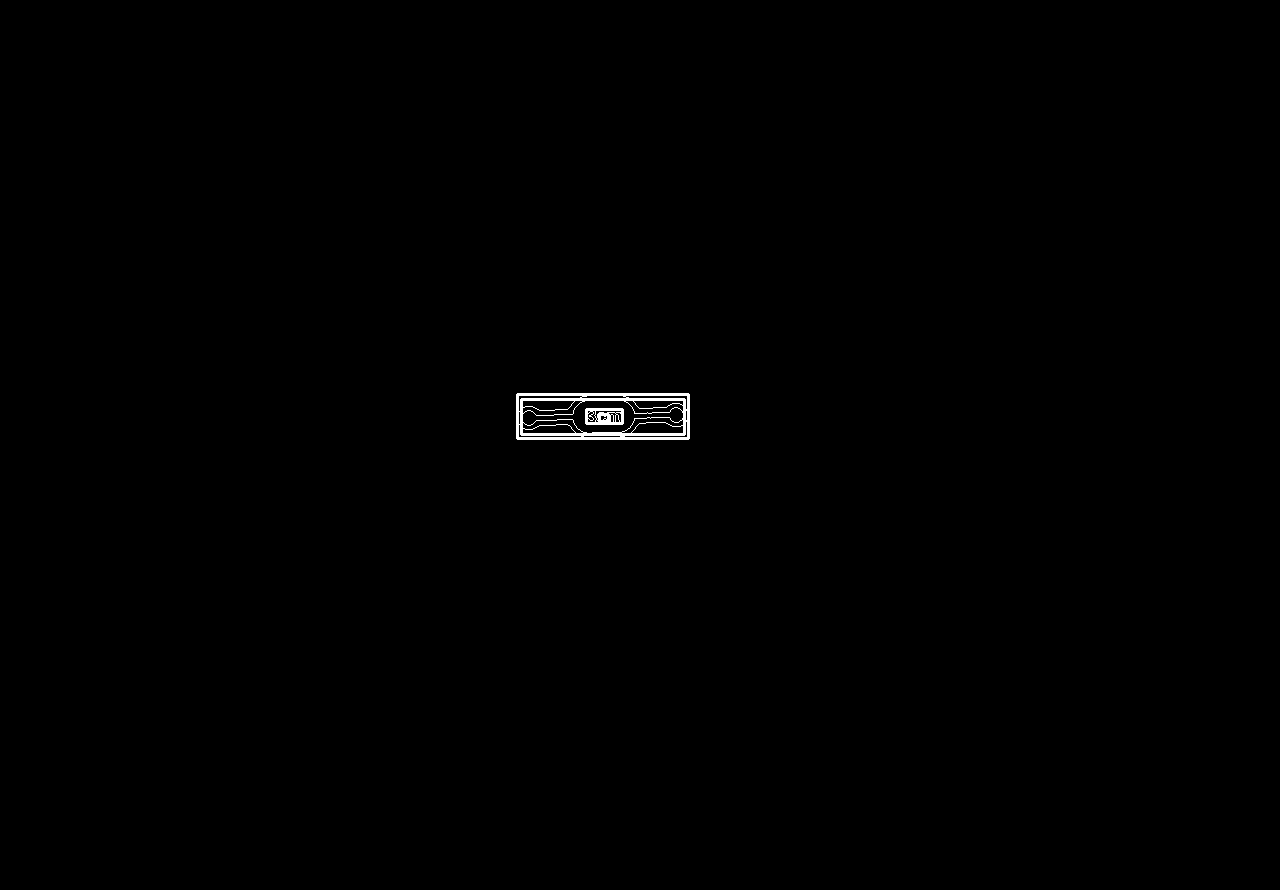

In [178]:
contours_dict = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })
  

cv2_imshow(temp_result)

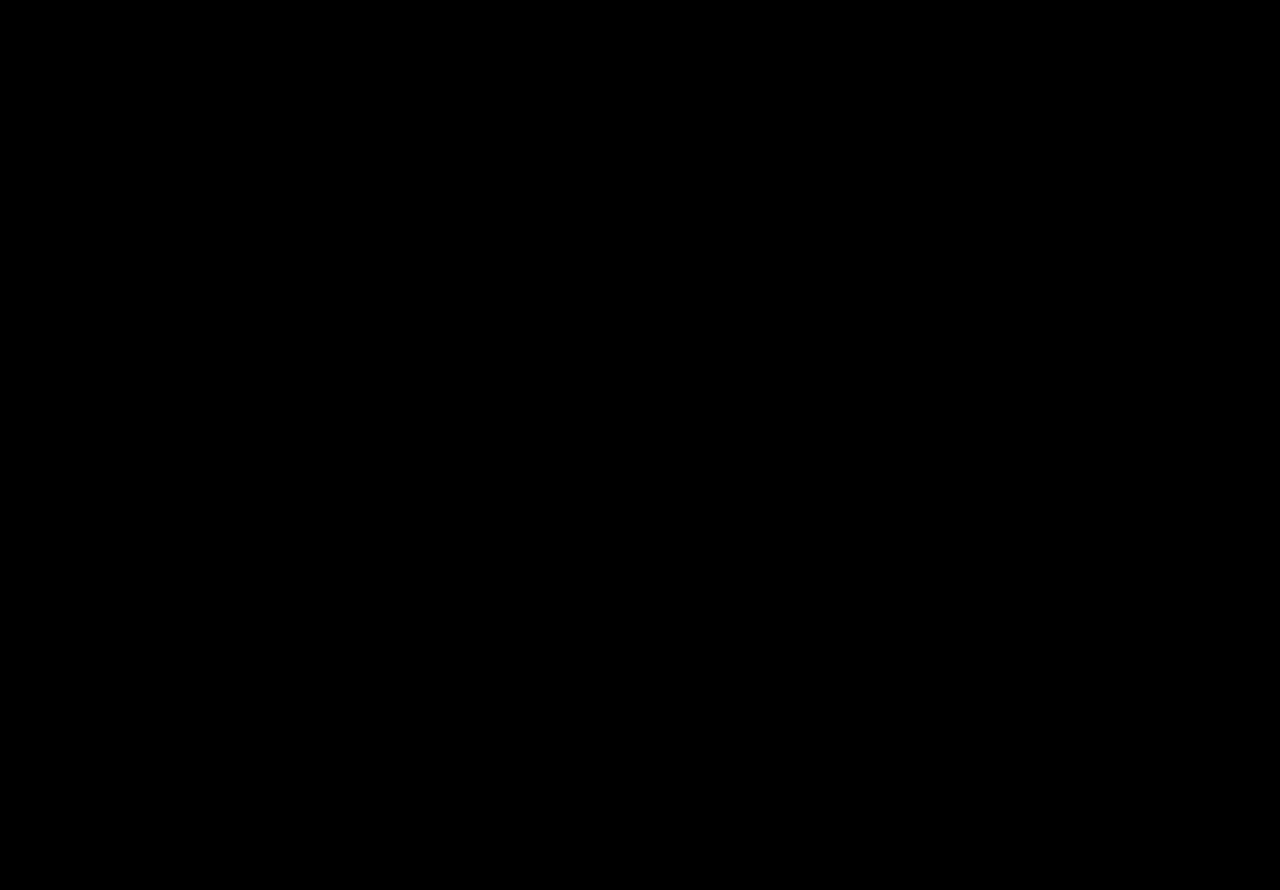

In [179]:
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MAX_WIDTH, MAX_HEIGHT = 100, 100
MIN_RATIO, MAX_RATIO = 0.25, 1.5

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and d['w'] < MAX_WIDTH and d['h'] < MAX_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
    
cv2_imshow(temp_result)

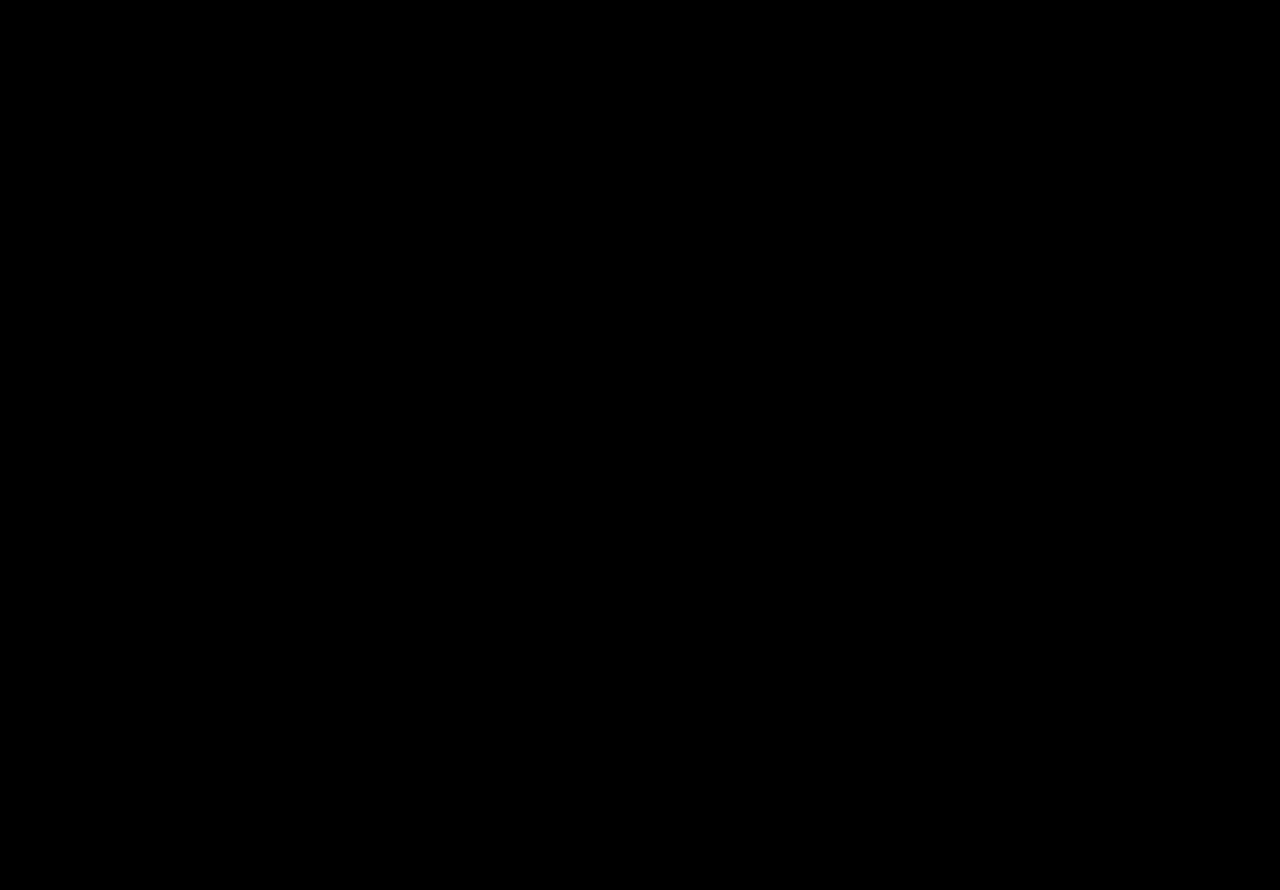

In [180]:
#리얼 번호판 추려내기
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            # dx = abs(d1['cx'] - d2['cx'])
            # dy = abs(d1['cy'] - d2['cy'])

            # diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            # distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            # if dx == 0:
            #     angle_diff = 90
            # else:
            #     angle_diff = np.degrees(np.arctan(dy / dx))
            # area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            # width_diff = abs(d1['w'] - d2['w']) / d1['w']
            # height_diff = abs(d1['h'] - d2['h']) / d1['h']

            # if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            # and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            # and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
            matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        # if len(matched_contours_idx) < MIN_N_MATCHED:
        #     continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            # if d4['idx'] not in matched_contours_idx:
            unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        # recursive_contour_list = find_chars(unmatched_contour)
        
        # for idx in recursive_contour_list:
        #     matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

cv2_imshow(temp_result)

In [181]:
#똑바로 돌리기
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    # if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
    #     continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })

In [182]:
#최종확인
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    print("img")
    cv2_imshow(img_result)

    chars = pytesseract.image_to_string(img_result, config='--psm 6')
    
    result_chars = ''
    has_digit = False
    for c in chars:
        if c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    print(result_chars)
    plate_chars.append(result_chars)

    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')
    plt.show()

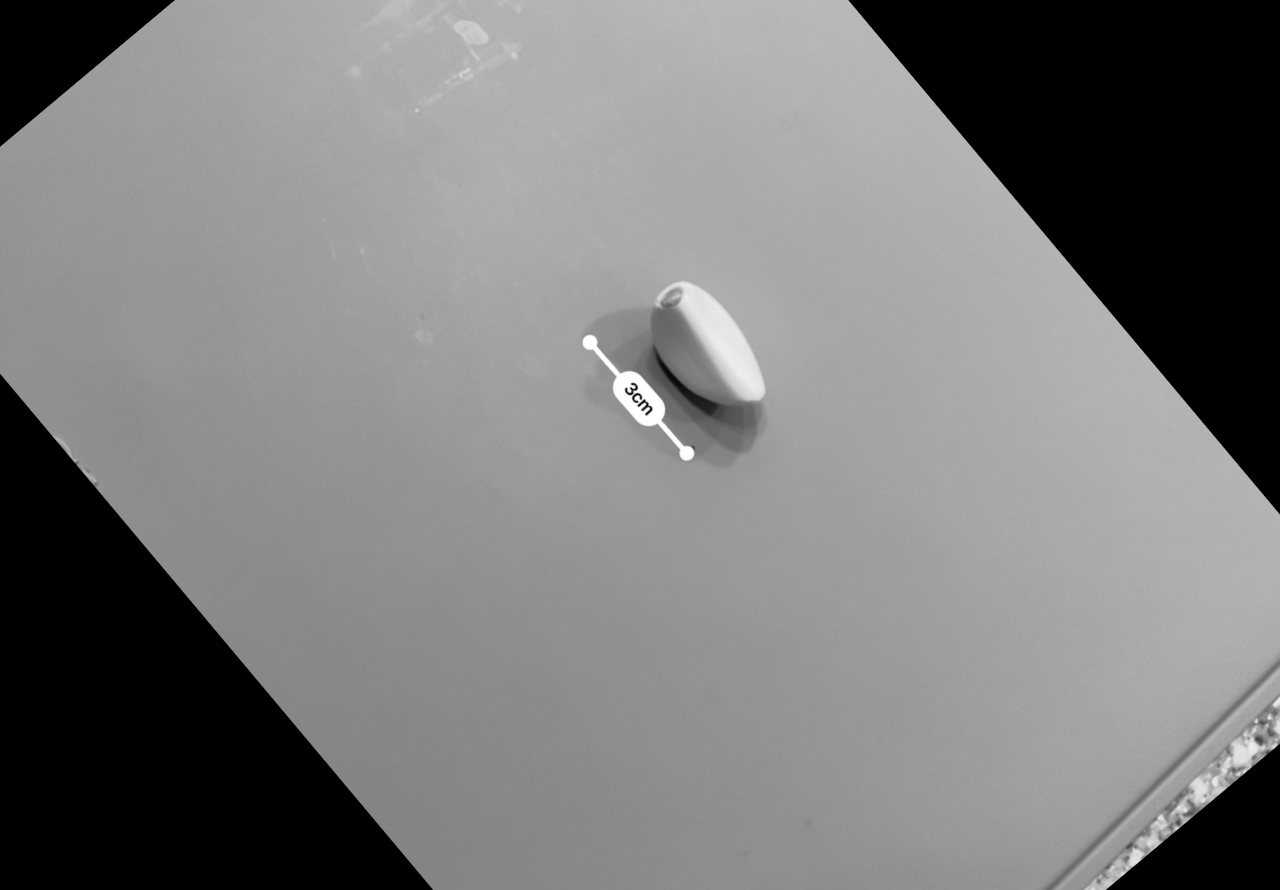

A.
5
=!


In [183]:
#image rotation
(h,w) = grayCp.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -50, 1.0)
rotated = cv2.warpAffine(grayCp, M, (w,h))
cv2_imshow(rotated)

#text
options = "--psm 6"
text = pytesseract.image_to_string(rotated, config=options)
arr = text.split('\n')[0:-1]
text = '\n'.join(arr)
print(text)

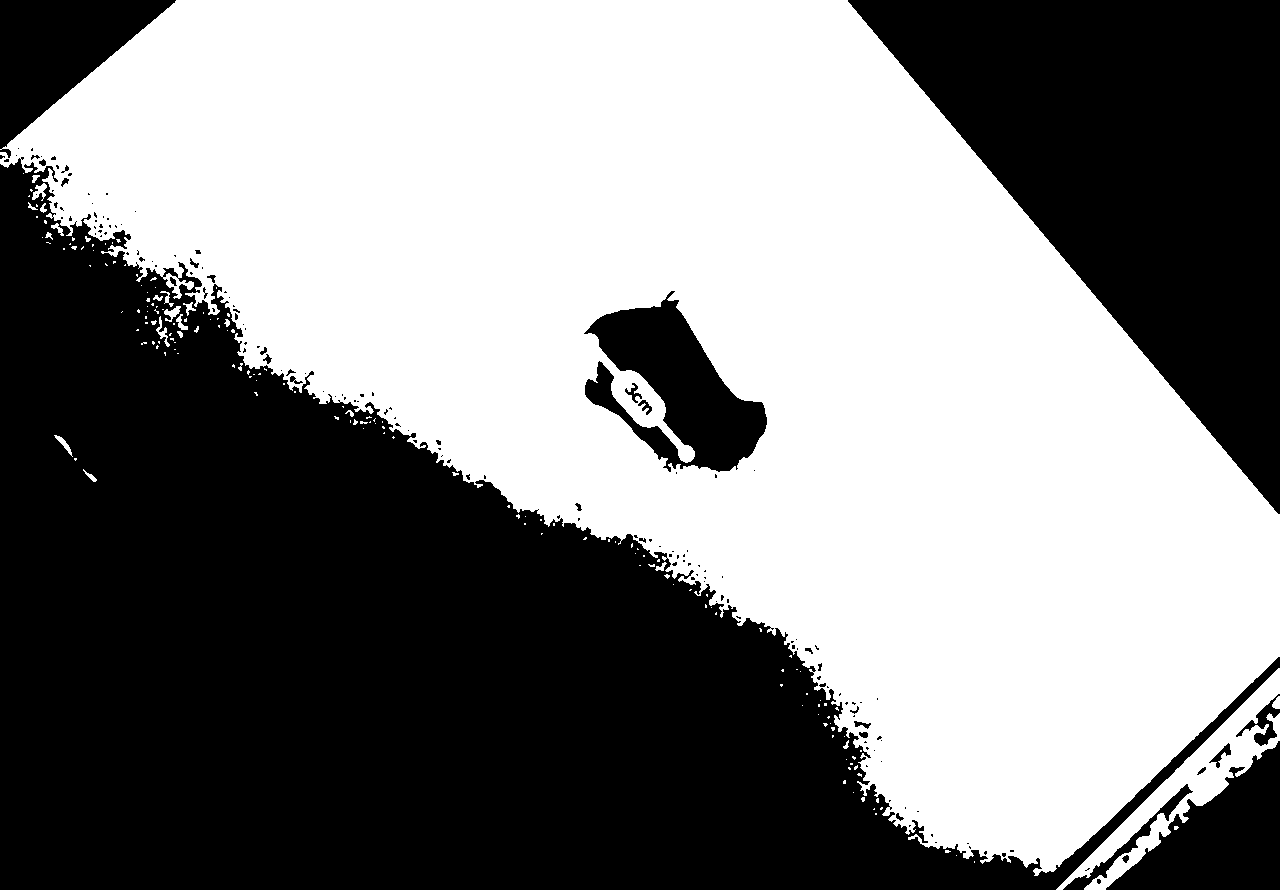

ag
“a te
Pooa
et
aaa
ila
a \
SS “a ™
bes
rs
Mies.
Sie
“4 A



In [184]:
# thresholding
blurred = cv2.GaussianBlur(rotated, (5,5),0)

(T, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY) #80
cv2_imshow(thresh)

#text
options = "--psm 6"
text = pytesseract.image_to_string(thresh, config=options) 
print(text)

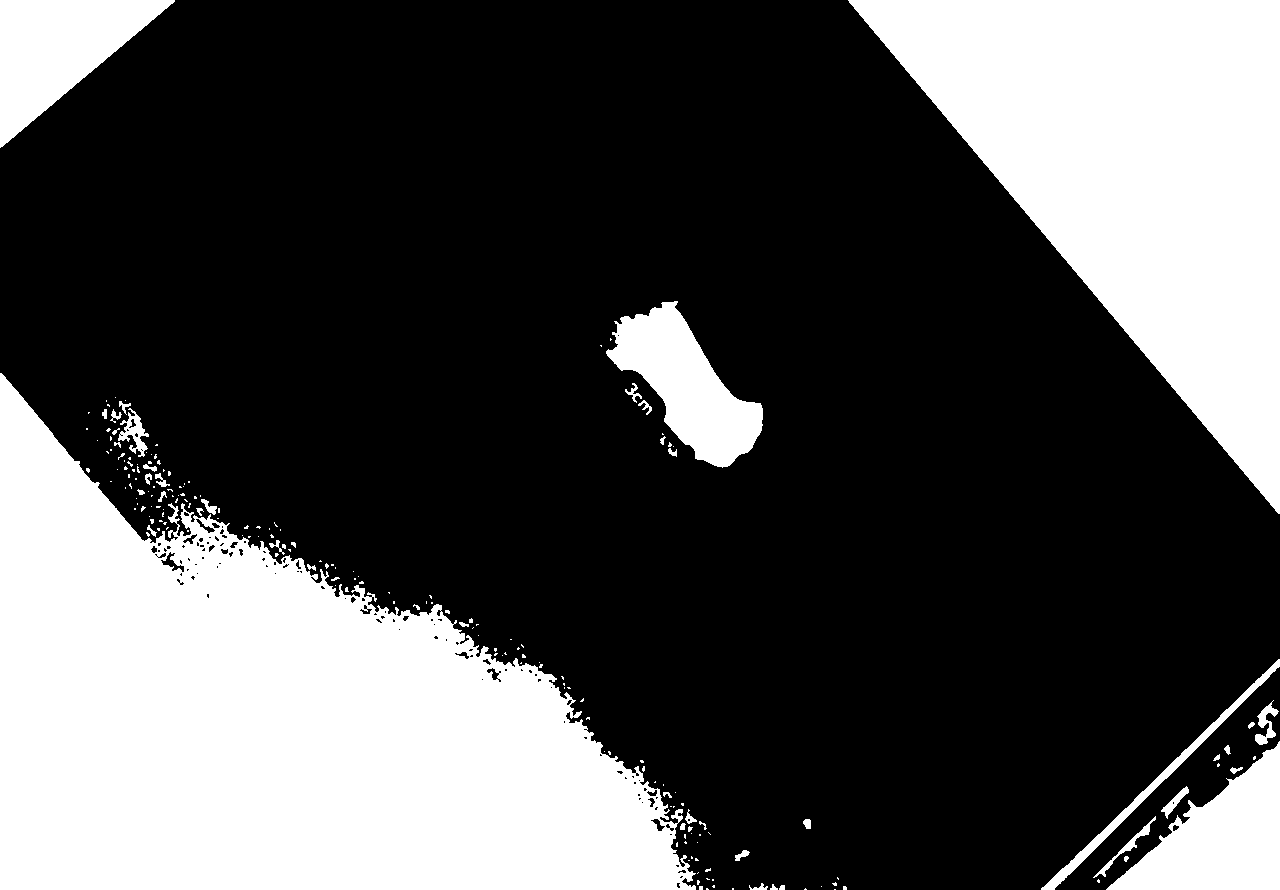

ry
; Be x
hha in
enon '
ee
Bhi
Ms
“hy
~ ,
7 e
i 4
aa i
eed ha



In [185]:
# thresholdingInv
blurred = cv2.GaussianBlur(rotated, (5,5),0)

(T, thresh) = cv2.threshold(blurred, 140, 255, cv2.THRESH_BINARY_INV) #80
cv2_imshow(thresh)

#text
options = "--psm 6"
text = pytesseract.image_to_string(thresh, config=options) # , config=options
print(text)

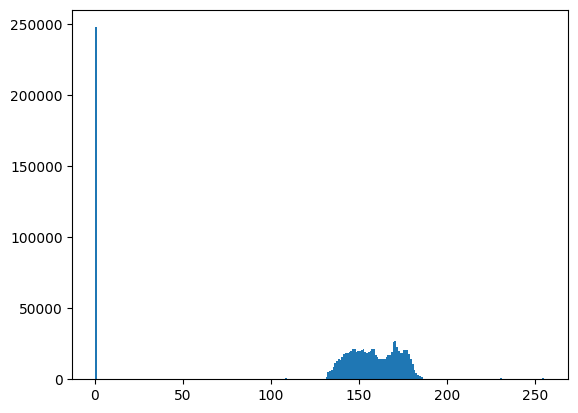

In [186]:
hist = plt.hist(rotated.ravel(), 256, [0,256])
plt.show()